In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
#Loading diabetes dataset
df = pd.read_csv(r'D:\shravani\datavisualization\diabetes1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pregnancies                        768 non-null    float64
 1   Glucose                            768 non-null    float64
 2   BloodPressure                      768 non-null    float64
 3   SkinThickness                      768 non-null    float64
 4   Insulin                            768 non-null    float64
 5   BMI                                768 non-null    float64
 6   DiabetesPedigreeFunction           768 non-null    float64
 7   Age                                768 non-null    float64
 8   Outcome                            768 non-null    int64  
 9   NEW_Glucose_low                    768 non-null    int64  
 10  NEW_Glucose_normal                 768 non-null    int64  
 11  NEW_Glucose_prediabetes            768 non-null    int64  

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_Glucose_low,...,NEW_Glucose_prediabetes,NEW_BMI_2 degree obesity,NEW_BMI_3 degree obesity,NEW_BMI_normal,NEW_BMI_overweight,NEW_BMI_underweight,NEW_AGE_old age,NEW_AGE_young age,NEW_BloodPressure_hypertension,NEW_BloodPressure_prehypertension
0,0.6,0.765432,-0.012662,0.857143,0.000000,0.131868,0.665359,1.235294,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.4,-0.790123,-0.387662,0.000000,0.000000,-0.637363,-0.056209,0.117647,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.629630,-0.512662,0.000000,0.000000,-1.000000,0.783007,0.176471,1,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.4,-0.691358,-0.387662,-0.857143,-2.108696,-0.472527,-0.537255,-0.470588,0,0,...,0,0,0,0,1,0,0,1,0,0
4,-0.6,0.493827,-2.012662,0.857143,1.891304,1.175824,2.163399,0.235294,1,0,...,0,0,1,0,0,0,0,1,0,0


In [6]:
#Spliting the dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
#Spliting the Data into Training, Development, and Testing Sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Logistic Regression (Development Set):
Accuracy: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.84       101
           1       0.76      0.53      0.62        53

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



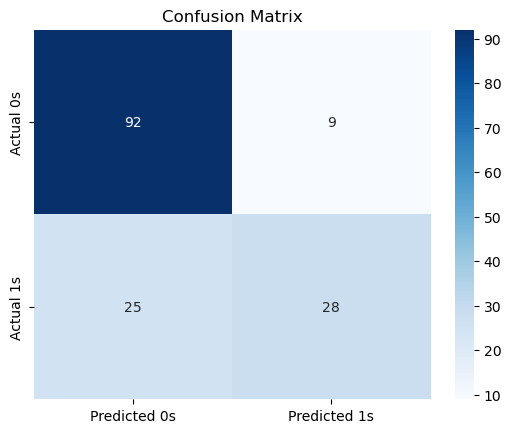

In [11]:
#Training logistic regression model on the Training Set and Evaluating on the Development Set
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
logistic_pred_dev = logistic_regression.predict(X_dev)
print("Logistic Regression (Development Set):")
print("Accuracy:", accuracy_score(y_dev, logistic_pred_dev))
print("Classification Report:\n", classification_report(y_dev, logistic_pred_dev))

sns.heatmap(confusion_matrix(y_dev, logistic_pred_dev), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()


Decision Tree (Development Set):
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       101
           1       0.64      0.57      0.60        53

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.74       154



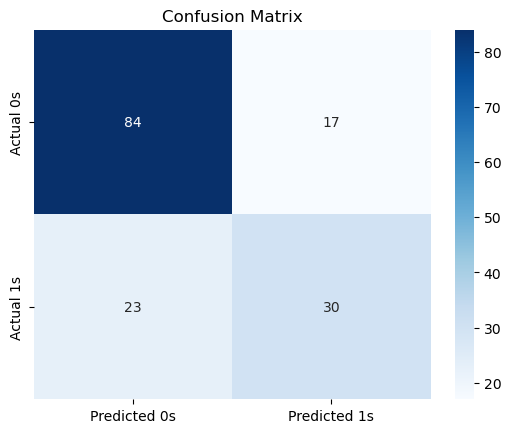

In [12]:
#Training decision tree model on the Training Set and Evaluating on the Development Set
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred_dev = decision_tree.predict(X_dev)
print("\nDecision Tree (Development Set):")
print("Accuracy:", accuracy_score(y_dev, decision_tree_pred_dev))
print("Classification Report:\n", classification_report(y_dev, decision_tree_pred_dev))

sns.heatmap(confusion_matrix(y_dev, decision_tree_pred_dev), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()

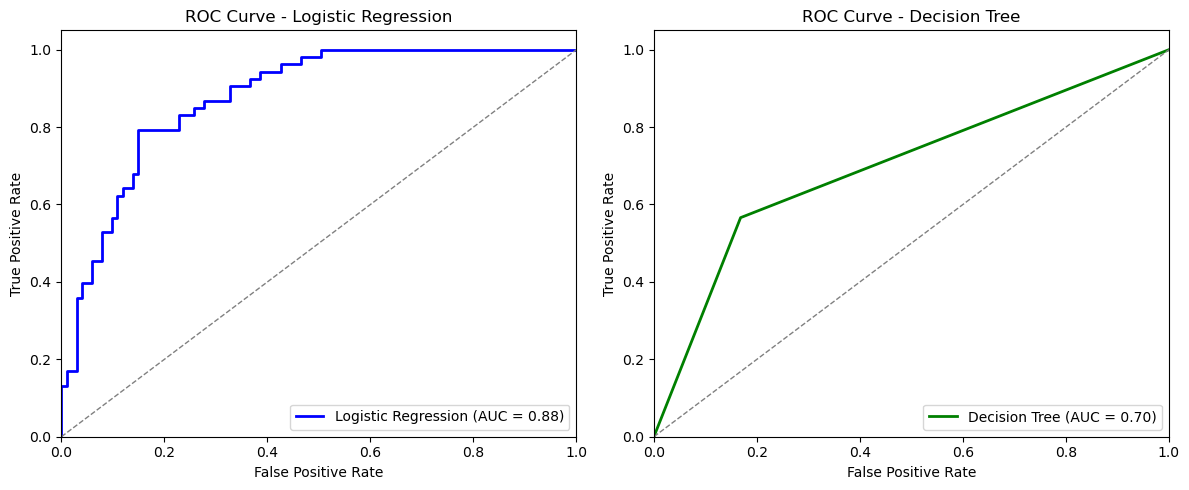

In [15]:
#Calculating predicted probabilities on the development set
logistic_pred_proba_dev = logistic_regression.predict_proba(X_dev)[:, 1]
decision_tree_pred_proba_dev = decision_tree.predict_proba(X_dev)[:, 1]

#Calculating ROC curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_dev, logistic_pred_proba_dev)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_dev, decision_tree_pred_proba_dev)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

plt.figure(figsize=(12, 5))

#Ploting ROC curve for logistic regression
plt.subplot(1, 2, 1)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

#Ploting ROC curve for decision tree
plt.subplot(1, 2, 2)
plt.plot(fpr_decision_tree, tpr_decision_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

1. The logistic regression model achieves higher accuracy (77.9% vs. 74.0%) and F1-score (0.84 vs. 0.81 for class 0, 0.62 vs. 0.60 for class 1) compared to the decision tree model. Additionally, the logistic regression model has higher recall for class 0 (0.91 vs. 0.83), indicating its better ability to correctly identify patients without diabetes. Therefore, based on these metrics, the logistic regression model appears to be the better performing model on the development set.
2. Logistic regression model has AUC of 0.88 and decision tree model has AUC of 0.70 for, it suggests that the logistic regression model performs significantly better in distinguishing between positive and negative instances compared to the decision tree model.
Hence, retraining combined training and development data with logistic regression model then evaluating the logistic regression model on the test set.

Logistic Regression (Test Set):
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



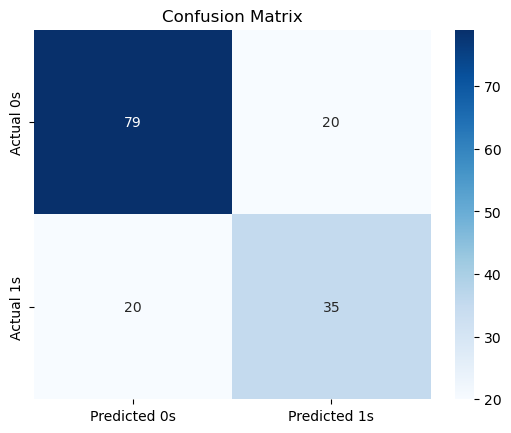

In [16]:
#Retraining Logistic Regression Model on Combined Training and Development Data
logistic_regression_selectedModel = LogisticRegression(random_state=42)
logistic_regression_selectedModel.fit(X_train_dev, y_train_dev)

#Evaluating Logistic Regression Model on Test Data
logistic_pred_test = logistic_regression_selectedModel.predict(X_test)
print("Logistic Regression (Test Set):")
print("Accuracy:", accuracy_score(y_test, logistic_pred_test))
print("Classification Report:\n", classification_report(y_test, logistic_pred_test))

sns.heatmap(confusion_matrix(y_test, logistic_pred_test), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0s', 'Predicted 1s'], 
            yticklabels=['Actual 0s', 'Actual 1s'])
plt.title('Confusion Matrix')
plt.show()